# Generator

In [7]:
%matplotlib inline
import numpy as np
import os
from timeit import default_timer as timer
import image_tools as imt
from augmentator import Augmentator
from generator import Generator

In [8]:
image_shape = [128,128,1]
images_dir  = "/netforge/datasets/private/roman/coins/2017-11-29/images/valid/"
dataset_dir = "/netforge/datasets/private/roman/coins/2017-11-29/datasets/valid/"

## Generate

In [9]:
%%time 
gen = Generator()
try:
    start = timer()
    gen.generate(
        images_path = images_dir, 
        image_shape = image_shape, 
        augmentator = Augmentator(), 
        image_num   = 550,
        aug_num     = 300, 
    )
    t = timer() - start
    augmented = gen.augmented
    n = augmented.shape[0]*augmented.shape[1]
    print("Augmented  : %d images" % n)
    print("Performance: %.1f img/sec" % (n/t))
    print("Augmented  :", augmented.dtype, augmented.shape, augmented.nbytes/1024/1024, "MB")
except KeyboardInterrupt:
    print("Interrupted")
print("-"*50)

100%|██████████| 300/300 [14:09<00:00,  2.83s/it]


Augmented  : 165000 images
Performance: 193.9 img/sec
Augmented  : uint8 (550, 300, 128, 128, 1) 2578.125 MB
--------------------------------------------------
CPU times: user 14min 52s, sys: 5min 8s, total: 20min 1s
Wall time: 14min 10s


## Save

In [10]:
%%time
dataset_path = gen.save(dataset_dir)
print("Dataset:", dataset_path)

Dataset: /netforge/datasets/private/roman/coins/2017-11-29/datasets/valid/550_300_128_128_1_uint8.npy
CPU times: user 0 ns, sys: 1.5 s, total: 1.5 s
Wall time: 1.5 s


## Load

In [11]:
%%time
try:
    del gen
except:
    pass
data = np.load(dataset_path)
print("Data:", data.dtype, data.shape, data.nbytes/1024/1024, "MB")
print("-"*50)

Data: uint8 (550, 300, 128, 128, 1) 2578.125 MB
--------------------------------------------------
CPU times: user 0 ns, sys: 704 ms, total: 704 ms
Wall time: 703 ms


## Show

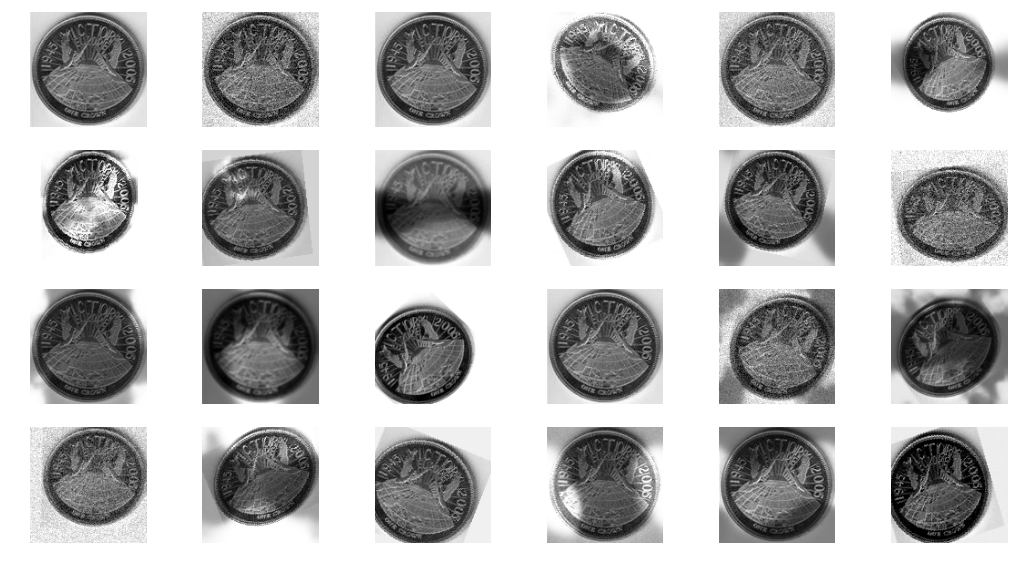

In [15]:
images = data[7,:24]
images = imt.uint8_to_float32(images)
imt.plot(images, 6)